# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a mchien learning model capaable of predicting whether or not they have a heart disease or not based on their medical history

We're going to take the following approach:
1. Problems definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heard disease?

## 2. Data

The original data came from Clearvland data from the UCI Machine learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is hwere you'll get different information about each of the features in your data

**Create data dictionary**

1. id (Unique id for each patient)
2. age (Age of the patient in years)
3. origin (place of study)
4. sex (Male/Female)
5. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
6. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. chol (serum cholesterol in mg/dl)
8. fbs (if fasting blood sugar > 120 mg/dl)
9. restecg (resting electrocardiographic results)
10. -- Values: [normal, stt abnormality, lv hypertrophy]
11. thalach: maximum heart rate achieved
12. exang: exercise-induced angina (True/ False)
13. oldpeak: ST depression induced by exercise relative to rest
14. slope: the slope of the peak exercise ST segment
15. ca: number of major vessels (0-3) colored by fluoroscopy
16. thal: [normal; fixed defect; reversible defect]
17. target - have diseasr or not (1=yes, 0=no)(=the predicted attribute)

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation

In [1]:
# Import all the tools we need
# Regular EDA(eploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv("/content/heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)
#### The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.
#### 1. What question(s) are you trying to solve?
#### 2. What kind of data do we have and how do we treat different types?
#### 3. What's missing from the data and how do you deal with it?
#### 4. Where are the outliers and why should you care about them?
#### 5. How can you add, change or remove features to get more out of your data

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

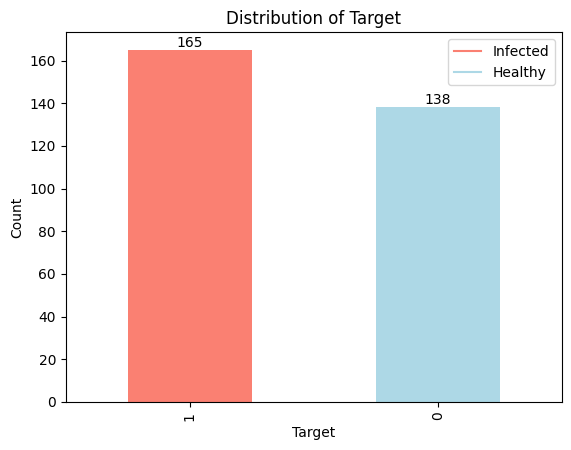

In [6]:
# Assuming df is your DataFrame and "target" is the column you're plotting

# Plot the bar graph
ax = df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

# Add labels to the bars
for i, count in enumerate(df["target"].value_counts()):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

# Set labels and title
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target')

#Add Legend
red_patch = plt.Line2D([], [], color='salmon', label='Infected')
blue_patch = plt.Line2D([], [], color='lightblue', label='Healthy')
plt.legend(handles=[red_patch, blue_patch])

# Show the plot
plt.show()


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to Sex

In [10]:
cross_table = pd.crosstab(df['sex'], df['target'], margins=True)
print(cross_table)


target    0    1  All
sex                  
0        24   72   96
1       114   93  207
All     138  165  303


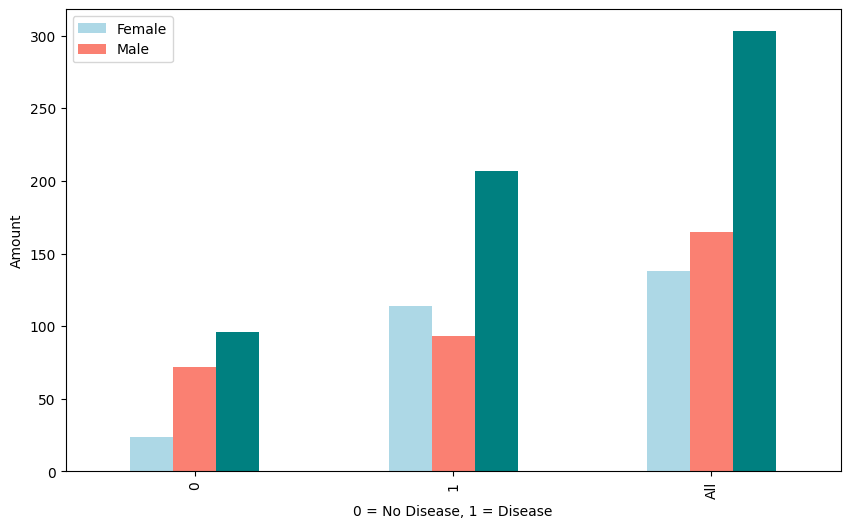

In [11]:
cross_table.plot(kind="bar", figsize=(10,6), color=["lightblue", "salmon", "teal"])
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])

## Age VS Max Heart Rate for Heart Disease

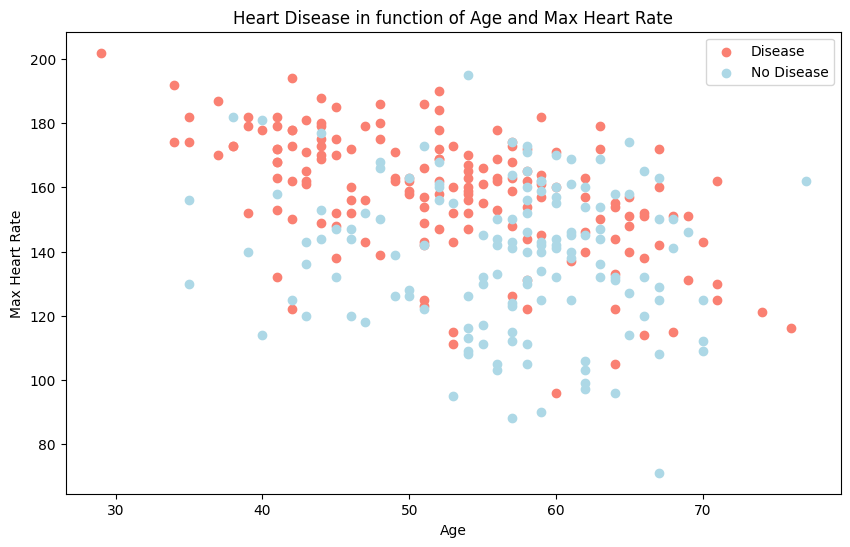

In [12]:
# Createa another figure
plt.figure(figsize = (10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target==1],
            c="salmon")


# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

# Add some helpful infor
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

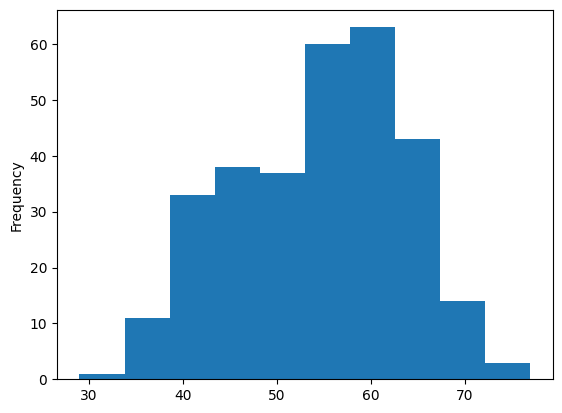

In [13]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Hear Disease Frequency per check pain type

In [14]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

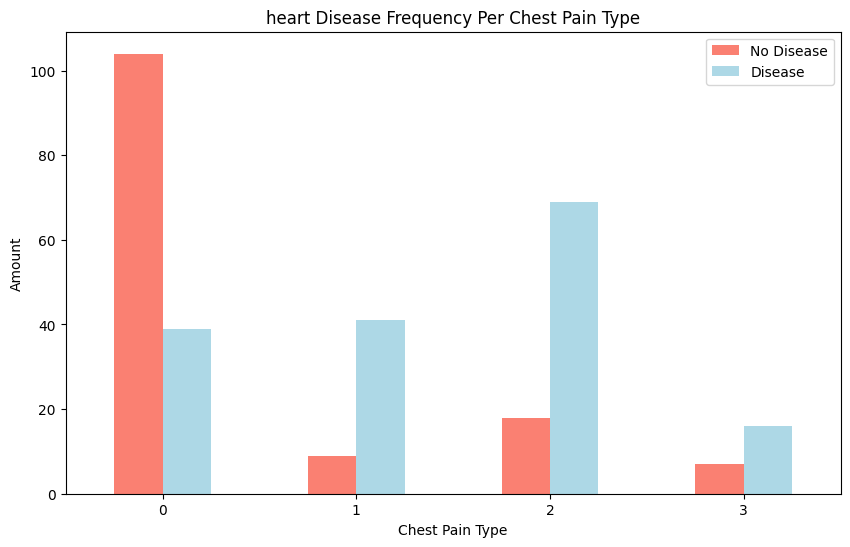

In [15]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind = "bar", figsize = (10,6), color=["salmon", "lightblue"])

# Add some communication
plt.title("heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

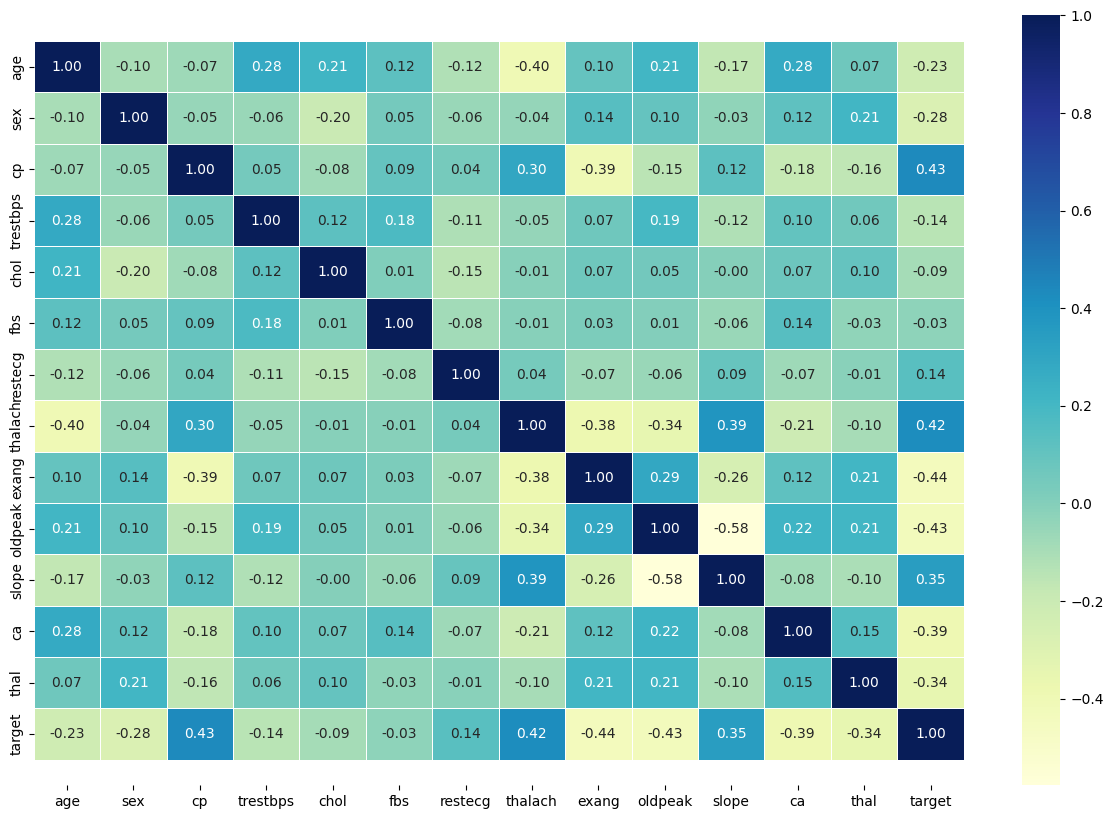

In [18]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot = True, linewidths = 0.5, fmt = ".2f", cmap = "YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## 5. Modelling

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# SPlit data into x and y
x = df.drop("target", axis=1)

y = df["target"]

In [21]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
# Split data into train and test sets
np.random.seed(42)

# split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [23]:
# Now we've got our data split into training and testing set, now it is time to build our machine learning model
# We'll train it (find the patterns) on the training set
# And we'll test it (use the patterns) on the testing set


### We are going to try three different machine learning model
1. Logistic Regression
2. K-Nearest Classifier
3. Random Forest Classifier

In [24]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}
# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train,y_test):
  """
  Fits and evaluates given machine learning models.
  models : a dict of different scikit-learn machine learning models
  x_train : training data (no labels)
  x_test : testing data (no labels)
  y_train : training labels
  y_test : test labels
  """
  # Set random seed
  np.random.seed(42)
  # Make a dict to keep model scores
  model_scores = {}
  #Loop through models
  for name, model in models.items():
    # Fit the model to the data
    model.fit(x_train, y_train)
    # Evaluate the model and append its score to model_scores
    model_scores[name] = model.score(x_test, y_test)
  return model_scores

In [25]:
model_scores = fit_and_score(models, x_train, x_test, y_train, y_test)
print(model_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442, 'KNN': 0.6885245901639344, 'Random Forest': 0.8360655737704918}


## Model Comparison

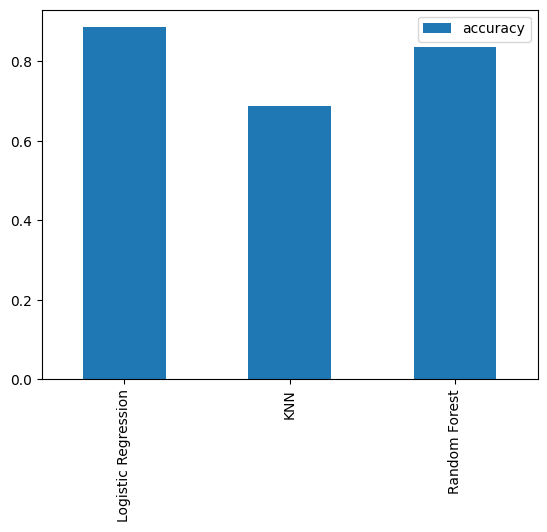

In [26]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

### Now we've got our baseline model and we know a model's first prediction aren't always always what we should based our next steps off... What should we do?

Let's look at the following:
- Hypyterparameter tuning
- Feature importance
- Confusion matrix
- Cross - validation
- Precision
- Recall
- F1 score
- Classification report
- ROC curve
- Area under the curve(AUC)

## Hyperparameter tuning

In [27]:
# Let's tune KNN

train_score = []
test_score = []

# Create a list of different value of n neighbors
neighbors = range(1,21)

#Setup KNN instance
knn = KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
  knn.set_params(n_neighbors = i)

  #Fit the algorithm
  knn.fit(x_train, y_train)

  #Update the training score list
  train_score.append(knn.score(x_train, y_train))

  #Update the test score list
  test_score.append(knn.score(x_test, y_test))

In [28]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [29]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


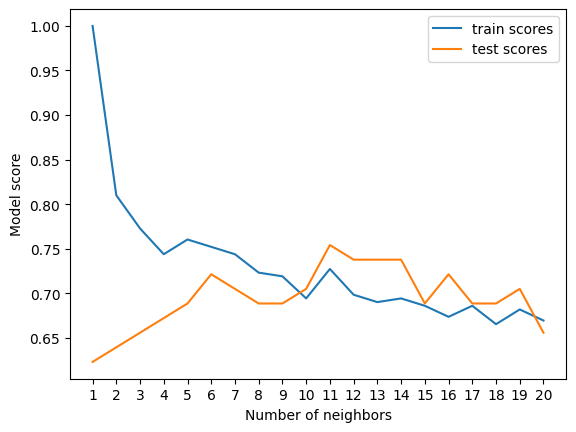

In [30]:
plt.plot(neighbors, train_score, label = "train scores")
plt.plot(neighbors, test_score, label = "test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_score)*100:.2f}%")

## Hyperparameter tuning with randomized search CV

We are going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using randomSearchCV

In [31]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
                "solver" : ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [0.5, 1, 'sqrt', 'auto'],
    'max_samples': [None]
}


### Now we've got hyperparameter grids set up for each of our models, let't tune them using randomizedSearchCV

In [32]:
#Tune logisticRegression()
np.random.seed(42)

#Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

#Fit reandom hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [34]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

## Now we've tuned logisticRegression(), let's do the same for RandomForestClassifier()

In [35]:
#Tune RandomForestClassifier()
np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

#Fit random hyperparameters search model for RandomForestClassifier
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [None],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
# Find the best hyperparameter
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_samples': None,
 'max_features': 1,
 'max_depth': 10}

In [37]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test, y_test)

0.8688524590163934

## Hyperparameter tuning using GridSearchCV
Since our LogisticRegression model provide the best score so far, we will try and improve them again using GridSearchCV.

In [38]:
# Different hyperparameters for our logistic regression model
log_reg_grid = {
    'penalty': ['l1', 'l2'],            # Regularization type (L1 or L2)
    'C': np.logspace(-4, 4, 30), # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],    # Optimization algorithm
    'max_iter': [100, 200, 300],        # Maximum number of iterations
    'multi_class': ['auto', 'ovr']      # Strategy for handling multiple classes
}

# Setup grid hyperparameter search for logistic regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'max_iter': [100, 200, 300],
                         'multi_class': ['auto', 'ovr'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=True)

In [39]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'liblinear'}

In [40]:
# Evaluate the LogisticRegression() model
gs_log_reg.score(x_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-Score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained models, first we need to make predictions

In [41]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [42]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [43]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

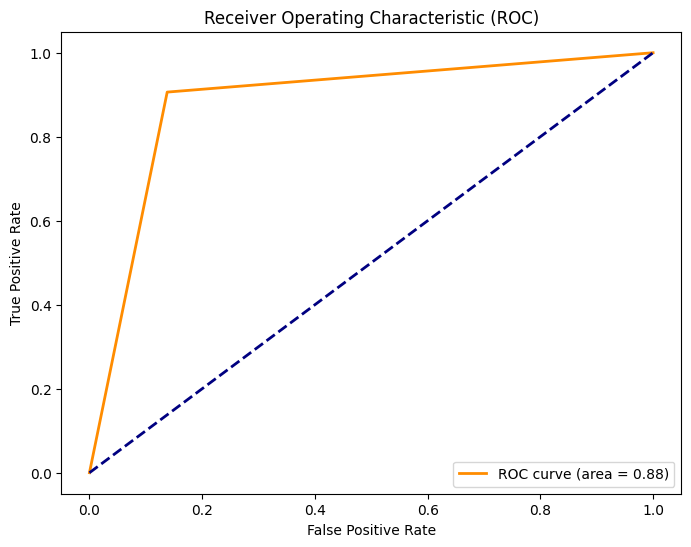

In [44]:
# Plot ROC curve and calculate AUC metric
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [45]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


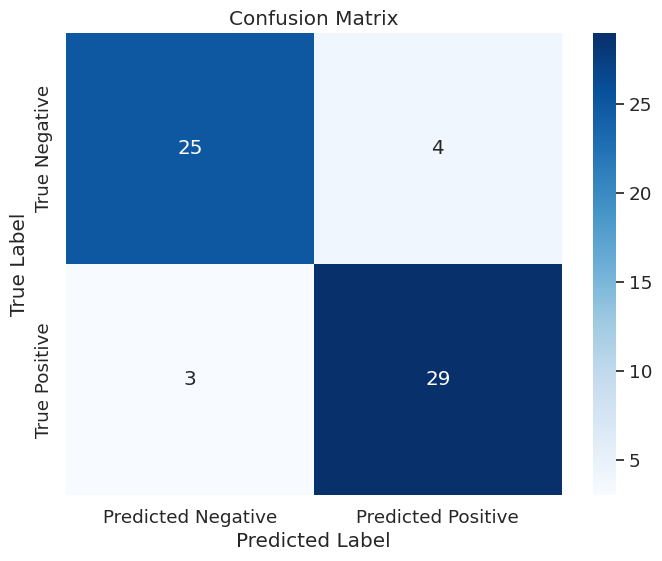

In [46]:
# Confusion Matrix with better representation

# y_test are the true labels, and y_preds are the predicted labels

conf_matrix = confusion_matrix(y_test, y_preds)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["True Negative", "True Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as a cross-validated precision recall and f1-score

In [47]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Now let's show our classification report in a more visually appealing manner using chatGPT

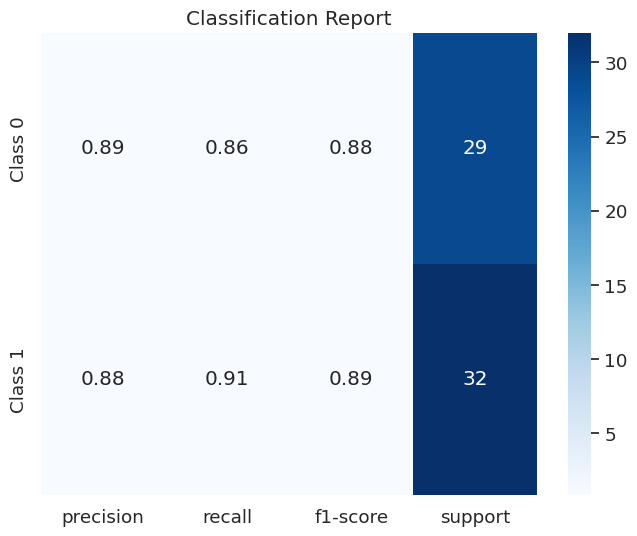

In [48]:
# y_test are the true labels, and y_preds are the predicted labels

# Generate the classification report
report = classification_report(y_test, y_preds, target_names=['Class 0', 'Class 1'], output_dict=True)

# Convert the classification report to a DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Create a heatmap to display the classification report
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0), annot=True, cmap='Blues')
plt.title("Classification Report")
plt.show()


### Calculate evaluation metric using cross validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score()

In [49]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'liblinear'}

In [58]:
# Create a new classifier using best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [61]:
# Cross-validated accuracy
cv_acc = np.mean(cross_val_score(clf, x, y, cv = 5, scoring="accuracy"))
cv_acc

0.8446994535519124

In [62]:
# Cross-validated precision
cv_precision = cross_val_score(clf, x, y, cv = 5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [63]:
# Cross-validated recall
cv_recall = cross_val_score(clf, x, y, cv = 5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [64]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, x, y, cv = 5, scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

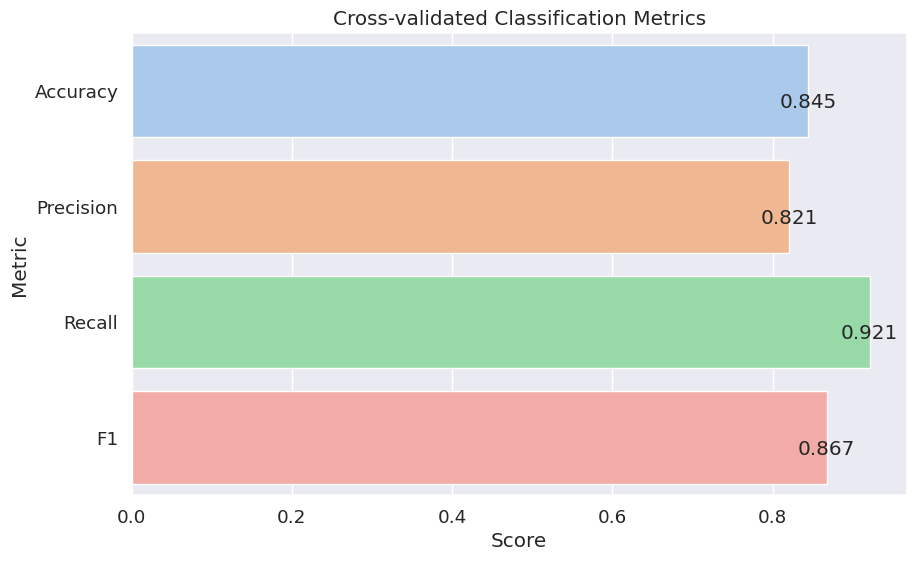

In [71]:
# Visualize our cross-validated metric
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1" : cv_f1},
                          index=[0])

sns.set_palette("pastel")

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=cv_metrics, orient="h")
ax.set_xlabel("Score")
ax.set_ylabel("Metric")
ax.set_title("Cross-validated Classification Metrics")

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.3f}', (p.get_x() + p.get_width(), p.get_y() + 0.5), ha='center', va='center')


plt.show()

## Feature Importance
- Feature importance is another as asking, "which feature contributed most to the outcome of the model and how did they contribute?"
- Finding feature importance is different for each learning model

In [75]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


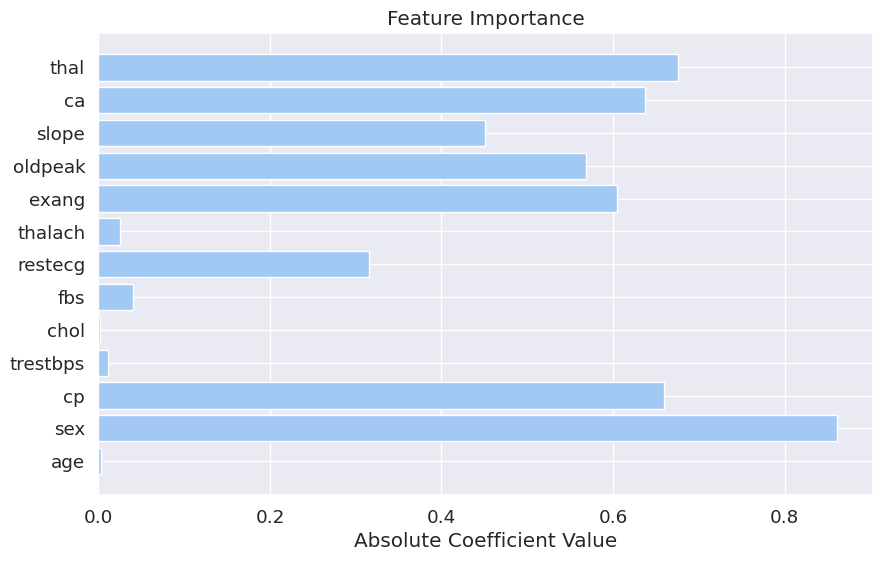

In [81]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")
clf.fit(x_train,y_train)
coefficients = clf.coef_
feature_names = x.columns.tolist()  # This will give you a list of feature names
feature_names

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
coefficients_normalized = scaler.fit_transform(coefficients)

absolute_coefficients = np.abs(coefficients)

plt.figure(figsize=(10, 6))
plt.barh(feature_names, absolute_coefficients[0])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance')
plt.show()


### Evaluation
If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost
* Could you improve the current model? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric)

 how would you export it and share it with other